In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
def load_images_from_folder(folder):
    images = []
    filenames = [] 
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames
    

In [85]:
def select_roi(image):
    roi = cv2.selectROI("Select ROI", image, False, False)
    cv2.destroyWindow("Select ROI")
    return roi

In [86]:
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()  # Create SIFT detector object
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    if descriptors is None:
        return np.array([])
    return descriptors

In [87]:
def match_features(query_features, dataset_features):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = []
    for features in dataset_features:
        if features is not None and features.size > 0:
            match = bf.match(query_features, features)
            match = sorted(match, key = lambda x: x.distance)
            matches.append(len(match))
        else:
            matches.append(0)
    return match

In [88]:
query_image = cv2.imread("Animals/pexels-photo-4577770.jpeg")

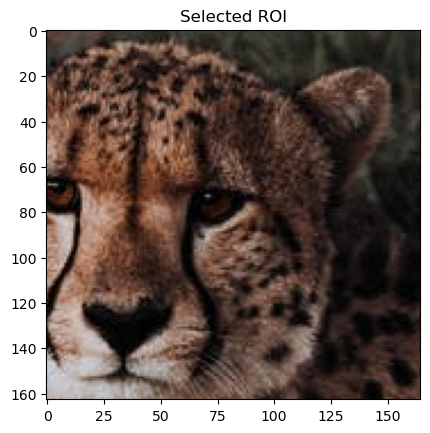

In [89]:
roi  = select_roi(query_image)
x, y, w, h = roi
roi_cropped = query_image[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2RGB))
plt.title("Selected ROI")
plt.show()


In [120]:
print(roi)

(207, 278, 165, 163)


In [121]:
dataset_path = "Animals"

In [122]:
images, filenames = load_images_from_folder(dataset_path)

In [123]:
print(f"Loaded {len(images)} images.")

Loaded 94 images.


In [124]:
query_features = extract_features(roi_cropped)

In [125]:
dataset_features = []
for img in images:
    descriptors = extract_features(img)
    dataset_features.append(descriptors)

In [126]:
matches = match_features(query_features, dataset_features)

In [127]:
match_scores = [len(matches) for matches_list in matches]

In [128]:
num_images = len(images)
num_matches = len(match_scores)

In [129]:
top_n = 10
sorted_indices = np.argsort(match_scores[:num_images])[::-1]


Image 93: 221 matches


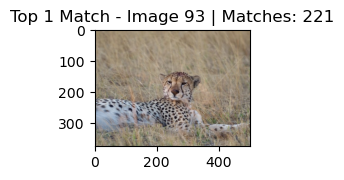

Image 34: 221 matches


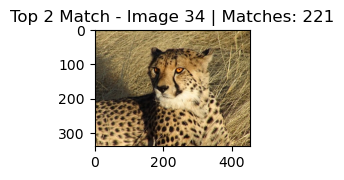

Image 25: 221 matches


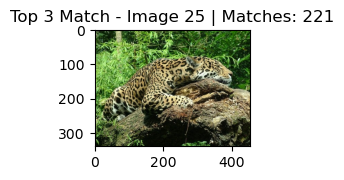

Image 26: 221 matches


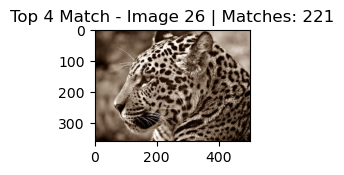

Image 27: 221 matches


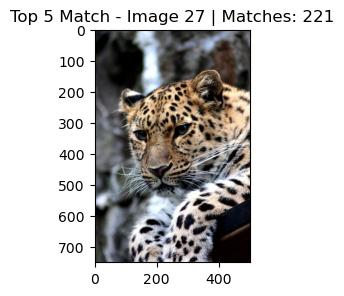

Image 28: 221 matches


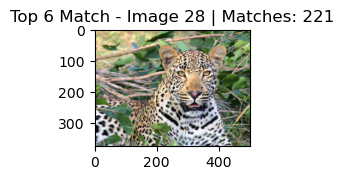

Image 29: 221 matches


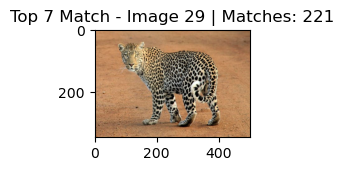

Image 30: 221 matches


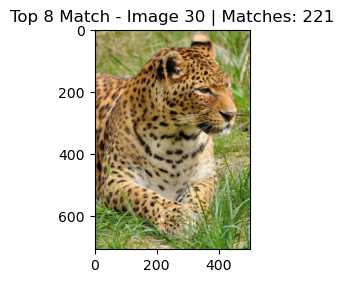

Image 31: 221 matches


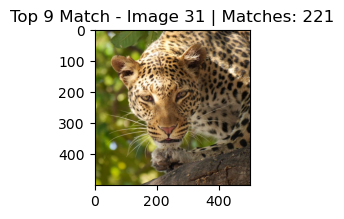

Image 32: 221 matches


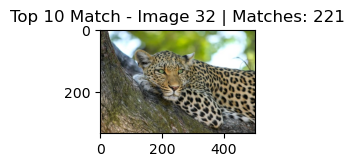

In [130]:
retrive =[]
for i in range(min(top_n, len(sorted_indices))):  # Ensure we don't go out of range
    idx = sorted_indices[i]
    if idx < num_images:
        print(f"Image {idx}: {match_scores[idx]} matches")
        img_to_show = cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB)
        retrive.append(img_to_show)
        plt.figure(figsize=(2, 10))
        plt.imshow(img_to_show)
        plt.title(f"Top {i+1} Match - Image {idx} | Matches: {match_scores[idx]}")
        # plt.axis('off')
        plt.show()
    else:
        print(f"Invalid index {idx} for the images list. Total images: {num_images}")

In [4]:
 os.getcwd()

'C:\\Users\\Lenovo\\anaconda3\\envs\\ROI_image_retrival\\Backend'

In [6]:
path = '../Frontend/public/Animals'
if not os.path.exists(path):
    print("Path does not exist:", path)

In [ ]:
import os
print(os.path.abspath('../Frontend/public/Animals/.ipynb_checkpoints'))